<a href="https://colab.research.google.com/github/arridoarfiadi/StarData-Research/blob/main/Studying%20Machine%20Learning/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

## Introduction


### Definition
a process for determining a line that best represents the general trend of a data set. So in essence, we have plots of data, and the equation tries to fit a line through it.

Basic formula: y = mx + b

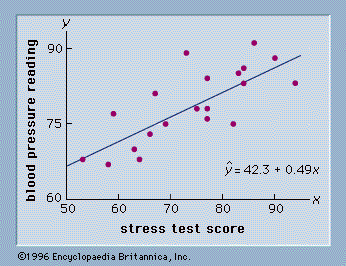




### How to create a model using OLS (ordinary least squares)
1. Use these equation to find m and b
* m = Σ((X - X̄)(Y - Ȳ)) / Σ((X - X̄)^2)
* b = Ȳ - b1*X̄
* where X̄ is the mean of X and Ȳ is the mean of Y.

2. There equations were derived from RSS = Σ(e^2) and Y = β0 + β1*X + ε. We want to find the values of β0 and β1 that minimize the RSS. To do this, we differentiate the RSS with respect to β0 and β1, set the derivatives to zero, and solve the resulting equations.

### Evaluating the Model

1.   Calculate the mean of the X values and the Y value
2.   Calculate the deviations of X and Y from their respective means:
> Deviation(X) = X - Mean(X)
> Deviation(Y) = Y - Mean(Y)
3.   Calculate the squared deviations of X and Y
4.   Calculate the sum of squared deviations
5.   Calculate the mean squared error (MSE):
> MSE = SSE / (number of data points - number of predictors)





### Assumptions

1.   It assumes that the independent and dependent variables are linear.
2.   Observations are independent of each other
3.   The spread of the residuals should be similar across the range of the predictors
> Residual differences between the observed values of the dependent variable (response) and the predicted values generated by the regression model
4.  Normality: Linear regression assumes that the errors follow a normal distribution. This means that the distribution of the residuals should be symmetric and bell-shaped
5.  No multicollinearity: Linear regression assumes that the predictors are not highly correlated with each other
6.  No endogeneity: Linear regression assumes that there is no relationship between the errors and the predictors

> independent variables (predictors) and the dependent variable (response)


### Pros:



1.   Simplicity: Simple linear regression involves only one independent variable, making it straightforward to interpret and understand

2.   Interpretability: The coefficients in simple linear regression have clear interpretations. The intercept represents the predicted value of the dependent variable when the independent variable is zero (if applicable), and the slope represents the change in the dependent variable for a one-unit increase in the independent variable.

3.   Relationship identification: Simple linear regression can help identify and quantify the relationship between the dependent variable and the independent variable. It provides insights into how changes in the independent variable are associated with changes in the dependent variable.

### Cons

1.   Assumes a linear relationship between the dependent variable and the independent variable. It may not adequately capture more complex relationships, such as non-linear or interactive effects
2.   Simple linear regression is sensitive to outliers and influential points. It is important to handle and clean your data before you pass it into this model
3.   It may not account for other relevant factors or confounding variables that influence the dependent variable


### Best use case

1. Housing price with regards to square footage (we have to make sure that the data is from a set period of time, otherwise it will not be accurate as price per square footage is different for different time periods)
2. Stock Price Analysis: The independent variable would be the earnings per share (continuous) and the dependent variable would be the stock price (continuous).
3. Advertising Effectiveness: The independent variable would be the advertising expenditure (continuous) and the dependent variable would be the sales revenue (continuous)
4. Employee Performance Evaluation: The independent variable would be the years of experience (continuous) and the dependent variable would be the performance rating (continuous)
5. Customer Satisfaction Analysis: The independent variable would be the wait time (continuous) and the dependent variable would be the satisfaction rating (continuous)
6. Fuel Efficiency Assessment:The independent variable would be the speed (continuous) and the dependent variable would be the fuel efficiency (continuous).

# Example 1: Predicting house prices based on the Square Footage

In [4]:
# https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

import pandas as pd

df = pd.read_csv('Housing.csv')
df = df[['price', 'area']]
df

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420
...,...,...
540,1820000,3000
541,1767150,2400
542,1750000,3620
543,1750000,2910


## Identifying Outliers

In [5]:
#make a box plot
import plotly.express as px

fig = px.box(df['price'], y = 'price')

fig.show()

In [ ]:
fig = px.box(df['area'], y = 'area')

fig.show()

## Remove outliers

In [6]:
# calculate the interquartile range (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# remove outliers from the 'B' column
cleaned_df = df[~((df['price'] < (Q1['price'] - 1.5 * IQR['price'])) | (df['price'] > (Q3['price'] + 1.5 * IQR['price'])))]
cleaned_df = cleaned_df[~((cleaned_df['area'] < (Q1['area'] - 1.5 * IQR['area'])) | (cleaned_df['area'] > (Q3['area'] + 1.5 * IQR['area'])))]

In [8]:
fig = px.box(cleaned_df['area'], y = 'area')

fig.show()

In [ ]:
cleaned_df

,price,area
15,9100000,6000
16,9100000,6600
17,8960000,8500
18,8890000,4600
19,8855000,6420
...,...,...
540,1820000,3000
541,1767150,2400
542,1750000,3620
543,1750000,2910


In [ ]:
cleaned_df.describe()

,price,area
count,5.200000e+02,520.000000
mean,4.576774e+06,4922.473077
std,1.594011e+06,1824.286879
min,1.750000e+06,1650.000000
25%,3.416000e+06,3520.000000
50%,4.270000e+06,4500.000000
75%,5.573750e+06,6070.000000
max,9.100000e+06,10500.000000


## Viewing distribution of the data

View distribution of housing prices

Bin Edges: [1750000. 2275000. 2800000. 3325000. 3850000. 4375000. 4900000. 5425000.
 5950000. 6475000. 7000000. 7525000. 8050000. 8575000. 9100000.]
Histogram Values: [15. 36. 64. 82. 77. 58. 45. 37. 36. 22. 16. 11. 11. 10.]


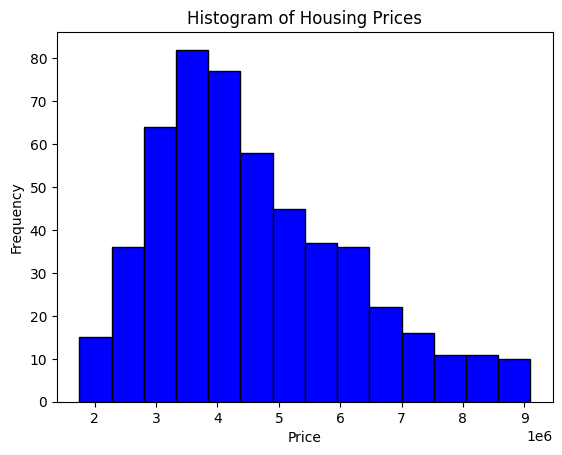

In [ ]:
# Plot the histogram and capture bin values
hist_values, bin_edges, _ = plt.hist(cleaned_df.price, bins='auto', color='blue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Housing Prices')

# Print bin values
print("Bin Edges:", bin_edges)
print("Histogram Values:", hist_values)

plt.show()

# left skewed, and generally normally distributed

View distribution of house square footage

Bin Edges: [ 1650.          2282.14285714  2914.28571429  3546.42857143
  4178.57142857  4810.71428571  5442.85714286  6075.
  6707.14285714  7339.28571429  7971.42857143  8603.57142857
  9235.71428571  9867.85714286 10500.        ]
Histogram Values: [19. 30. 84. 98. 58. 40. 61. 48. 27. 15. 20.  9.  5.  6.]


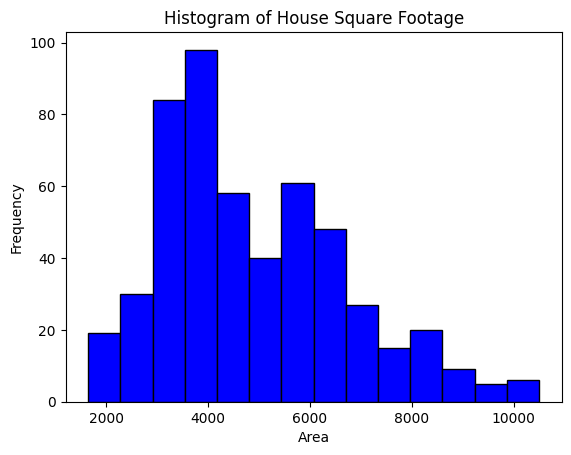

In [ ]:
# Plot the histogram and capture bin values
hist_values, bin_edges, _ = plt.hist(cleaned_df.area, bins='auto', color='blue', edgecolor='black')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Histogram of House Square Footage')

# Print bin values
print("Bin Edges:", bin_edges)
print("Histogram Values:", hist_values)

plt.show()

# left skewed, and generally normally distributed

## Create the the linear regression model

In [9]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = cleaned_df.area.values.reshape(-1,1)
y = cleaned_df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
#instantiate the linear regression model

from sklearn.linear_model import LinearRegression
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.2784653376810995

In [ ]:
y_pred_train = model.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score
r2_score_without_test = r2_score(y_train, y_pred_train)
print(r2_score_without_test)

0.273493554254406


In [ ]:
testing = [[1600], [500]] #LOL

model.predict(testing)

array([3094391.64007245, 2625452.91094434])

# Example 2: California Housing Market pt. 1
Predicting the median house value based off of median income value in a city in California

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df = df[['median_income', 'median_house_value']] #income measured in tens of thousands of US Dollars
df

,median_income,median_house_value
0,1.4936,66900.0
1,1.8200,80100.0
2,1.6509,85700.0
3,3.1917,73400.0
4,1.9250,65500.0
...,...,...
16995,2.3571,111400.0
16996,2.5179,79000.0
16997,3.0313,103600.0
16998,1.9797,85800.0


In [ ]:
df['median_income'] = df['median_income'] * 10000
df

,median_income,median_house_value
0,149360000.0,66900.0
1,182000000.0,80100.0
2,165090000.0,85700.0
3,319170000.0,73400.0
4,192500000.0,65500.0
...,...,...
16995,235710000.0,111400.0
16996,251790000.0,79000.0
16997,303130000.0,103600.0
16998,197970000.0,85800.0


## Identifying outliers

In [ ]:
#make a box plot
import plotly.express as px

fig = px.box(df['median_house_value'], y = 'median_house_value')

fig.show()

In [ ]:
fig = px.box(df['median_income'], y = 'median_income')

fig.show()

## Removing outliers

In [ ]:
# calculate the interquartile range (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# remove outliers from the 'B' column
cleaned_df = df[~((df['median_house_value'] < (Q1['median_house_value'] - 1.5 * IQR['median_house_value'])) | (df['median_house_value'] > (Q3['median_house_value'] + 1.5 * IQR['median_house_value'])))]
cleaned_df = cleaned_df[~((cleaned_df['median_income'] < (Q1['median_income'] - 1.5 * IQR['median_income'])) | (cleaned_df['median_income'] > (Q3['median_income'] + 1.5 * IQR['median_income'])))]

In [ ]:
fig = px.box(cleaned_df['median_income'], y = 'median_income')

fig.show()

In [ ]:
fig = px.box(cleaned_df['median_house_value'], y = 'median_house_value')

fig.show()

## Viewing distribution of the data

Median Income

Bin Edges: [ 4999.          6607.5106383   8216.0212766   9824.53191489
 11433.04255319 13041.55319149 14650.06382979 16258.57446809
 17867.08510638 19475.59574468 21084.10638298 22692.61702128
 24301.12765957 25909.63829787 27518.14893617 29126.65957447
 30735.17021277 32343.68085106 33952.19148936 35560.70212766
 37169.21276596 38777.72340426 40386.23404255 41994.74468085
 43603.25531915 45211.76595745 46820.27659574 48428.78723404
 50037.29787234 51645.80851064 53254.31914894 54862.82978723
 56471.34042553 58079.85106383 59688.36170213 61296.87234043
 62905.38297872 64513.89361702 66122.40425532 67730.91489362
 69339.42553191 70947.93617021 72556.44680851 74164.95744681
 75773.46808511 77381.9787234  78990.4893617  80599.        ]
Histogram Values: [ 18.  33.  66.  79. 156. 233. 329. 466. 435. 553. 681. 622. 680. 745.
 596. 708. 815. 633. 645. 723. 579. 556. 612. 499. 423. 455. 401. 303.
 404. 337. 256. 299. 208. 149. 212. 173. 137. 127. 107.  97.  64.  52.
  61.  50.  57.  44.  41.

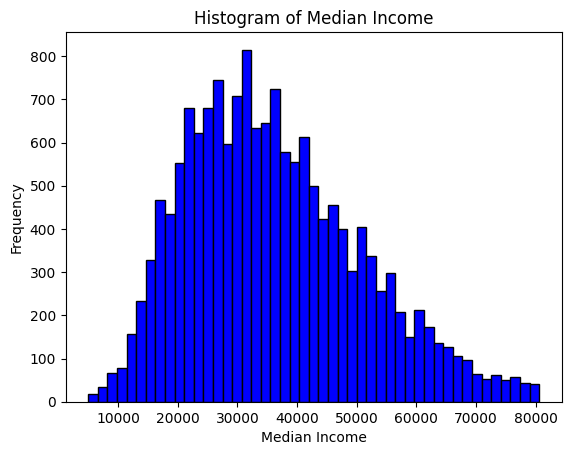

In [ ]:
import matplotlib.pyplot as plt
# Plot the histogram and capture bin values
hist_values, bin_edges, _ = plt.hist(cleaned_df.median_income, bins='auto', color='blue', edgecolor='black')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.title('Histogram of Median Income')

# Print bin values
print("Bin Edges:", bin_edges)
print("Histogram Values:", hist_values)

plt.show()

# left skewed, and generally normally distributed

Median House Values

Bin Edges: [ 14999.          25179.45652174  35359.91304348  45540.36956522
  55720.82608696  65901.2826087   76081.73913043  86262.19565217
  96442.65217391 106623.10869565 116803.56521739 126984.02173913
 137164.47826087 147344.93478261 157525.39130435 167705.84782609
 177886.30434783 188066.76086957 198247.2173913  208427.67391304
 218608.13043478 228788.58695652 238969.04347826 249149.5
 259329.95652174 269510.41304348 279690.86956522 289871.32608696
 300051.7826087  310232.23913043 320412.69565217 330593.15217391
 340773.60869565 350954.06521739 361134.52173913 371314.97826087
 381495.43478261 391675.89130435 401856.34782609 412036.80434783
 422217.26086957 432397.7173913  442578.17391304 452758.63043478
 462939.08695652 473119.54347826 483300.        ]
Histogram Values: [  9.  14.  65. 306. 455. 583. 520. 772. 640. 701. 627. 607. 779. 723.
 890. 650. 743. 607. 462. 517. 566. 494. 423. 365. 392. 355. 277. 253.
 149. 195. 203. 222. 254. 162. 151. 120.  92. 106.  77.  79.  59.  62.


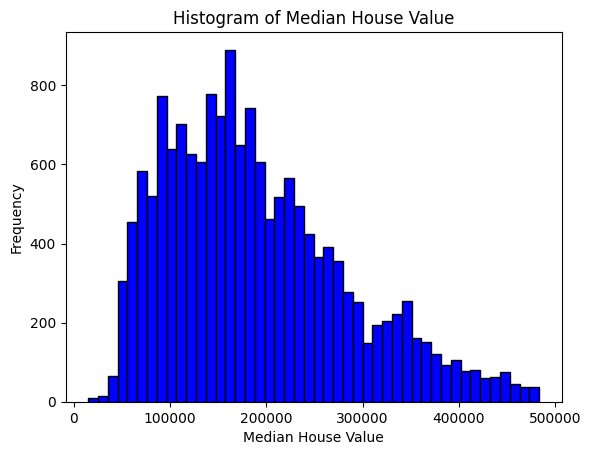

In [ ]:
# Plot the histogram and capture bin values
hist_values, bin_edges, _ = plt.hist(cleaned_df.median_house_value, bins='auto', color='blue', edgecolor='black')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Histogram of Median House Value')

# Print bin values
print("Bin Edges:", bin_edges)
print("Histogram Values:", hist_values)

plt.show()

# left skewed, and generally normally distributed

## Creating the Linear Regression Model

In [ ]:
#Training data
X = cleaned_df.median_income.values.reshape(-1,1)
y = cleaned_df.median_house_value


array([[14936.],
       [18200.],
       [16509.],
       ...,
       [30313.],
       [19797.],
       [30147.]])

In [ ]:
#Testing data
test_df = pd.read_csv('/content/sample_data/california_housing_test.csv')
test_df = test_df[['median_income', 'median_house_value']] #income measured in tens of thousands of US Dollars
test_df['median_income'] = test_df['median_income'] * 10000
test_df

,median_income,median_house_value
0,66085.0,344700.0
1,35990.0,176500.0
2,57934.0,270500.0
3,61359.0,330000.0
4,29375.0,81700.0
...,...,...
2995,11790.0,225000.0
2996,33906.0,237200.0
2997,22895.0,62000.0
2998,32708.0,162500.0


In [ ]:
X_test = test_df.median_income.values.reshape(-1,1)
y_test = test_df.median_house_value

In [ ]:
from sklearn.linear_model import LinearRegression
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
model.score(X_test, y_test)

0.4459734595930207

# Example 3: Re California Housing Market pt. 2
Predicting the housing price based off of total number of rooms and the population within a city in California

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


## Data Exploration with pairplot

Text(0.5, 1.0, 'Housing Prices Pairplot')

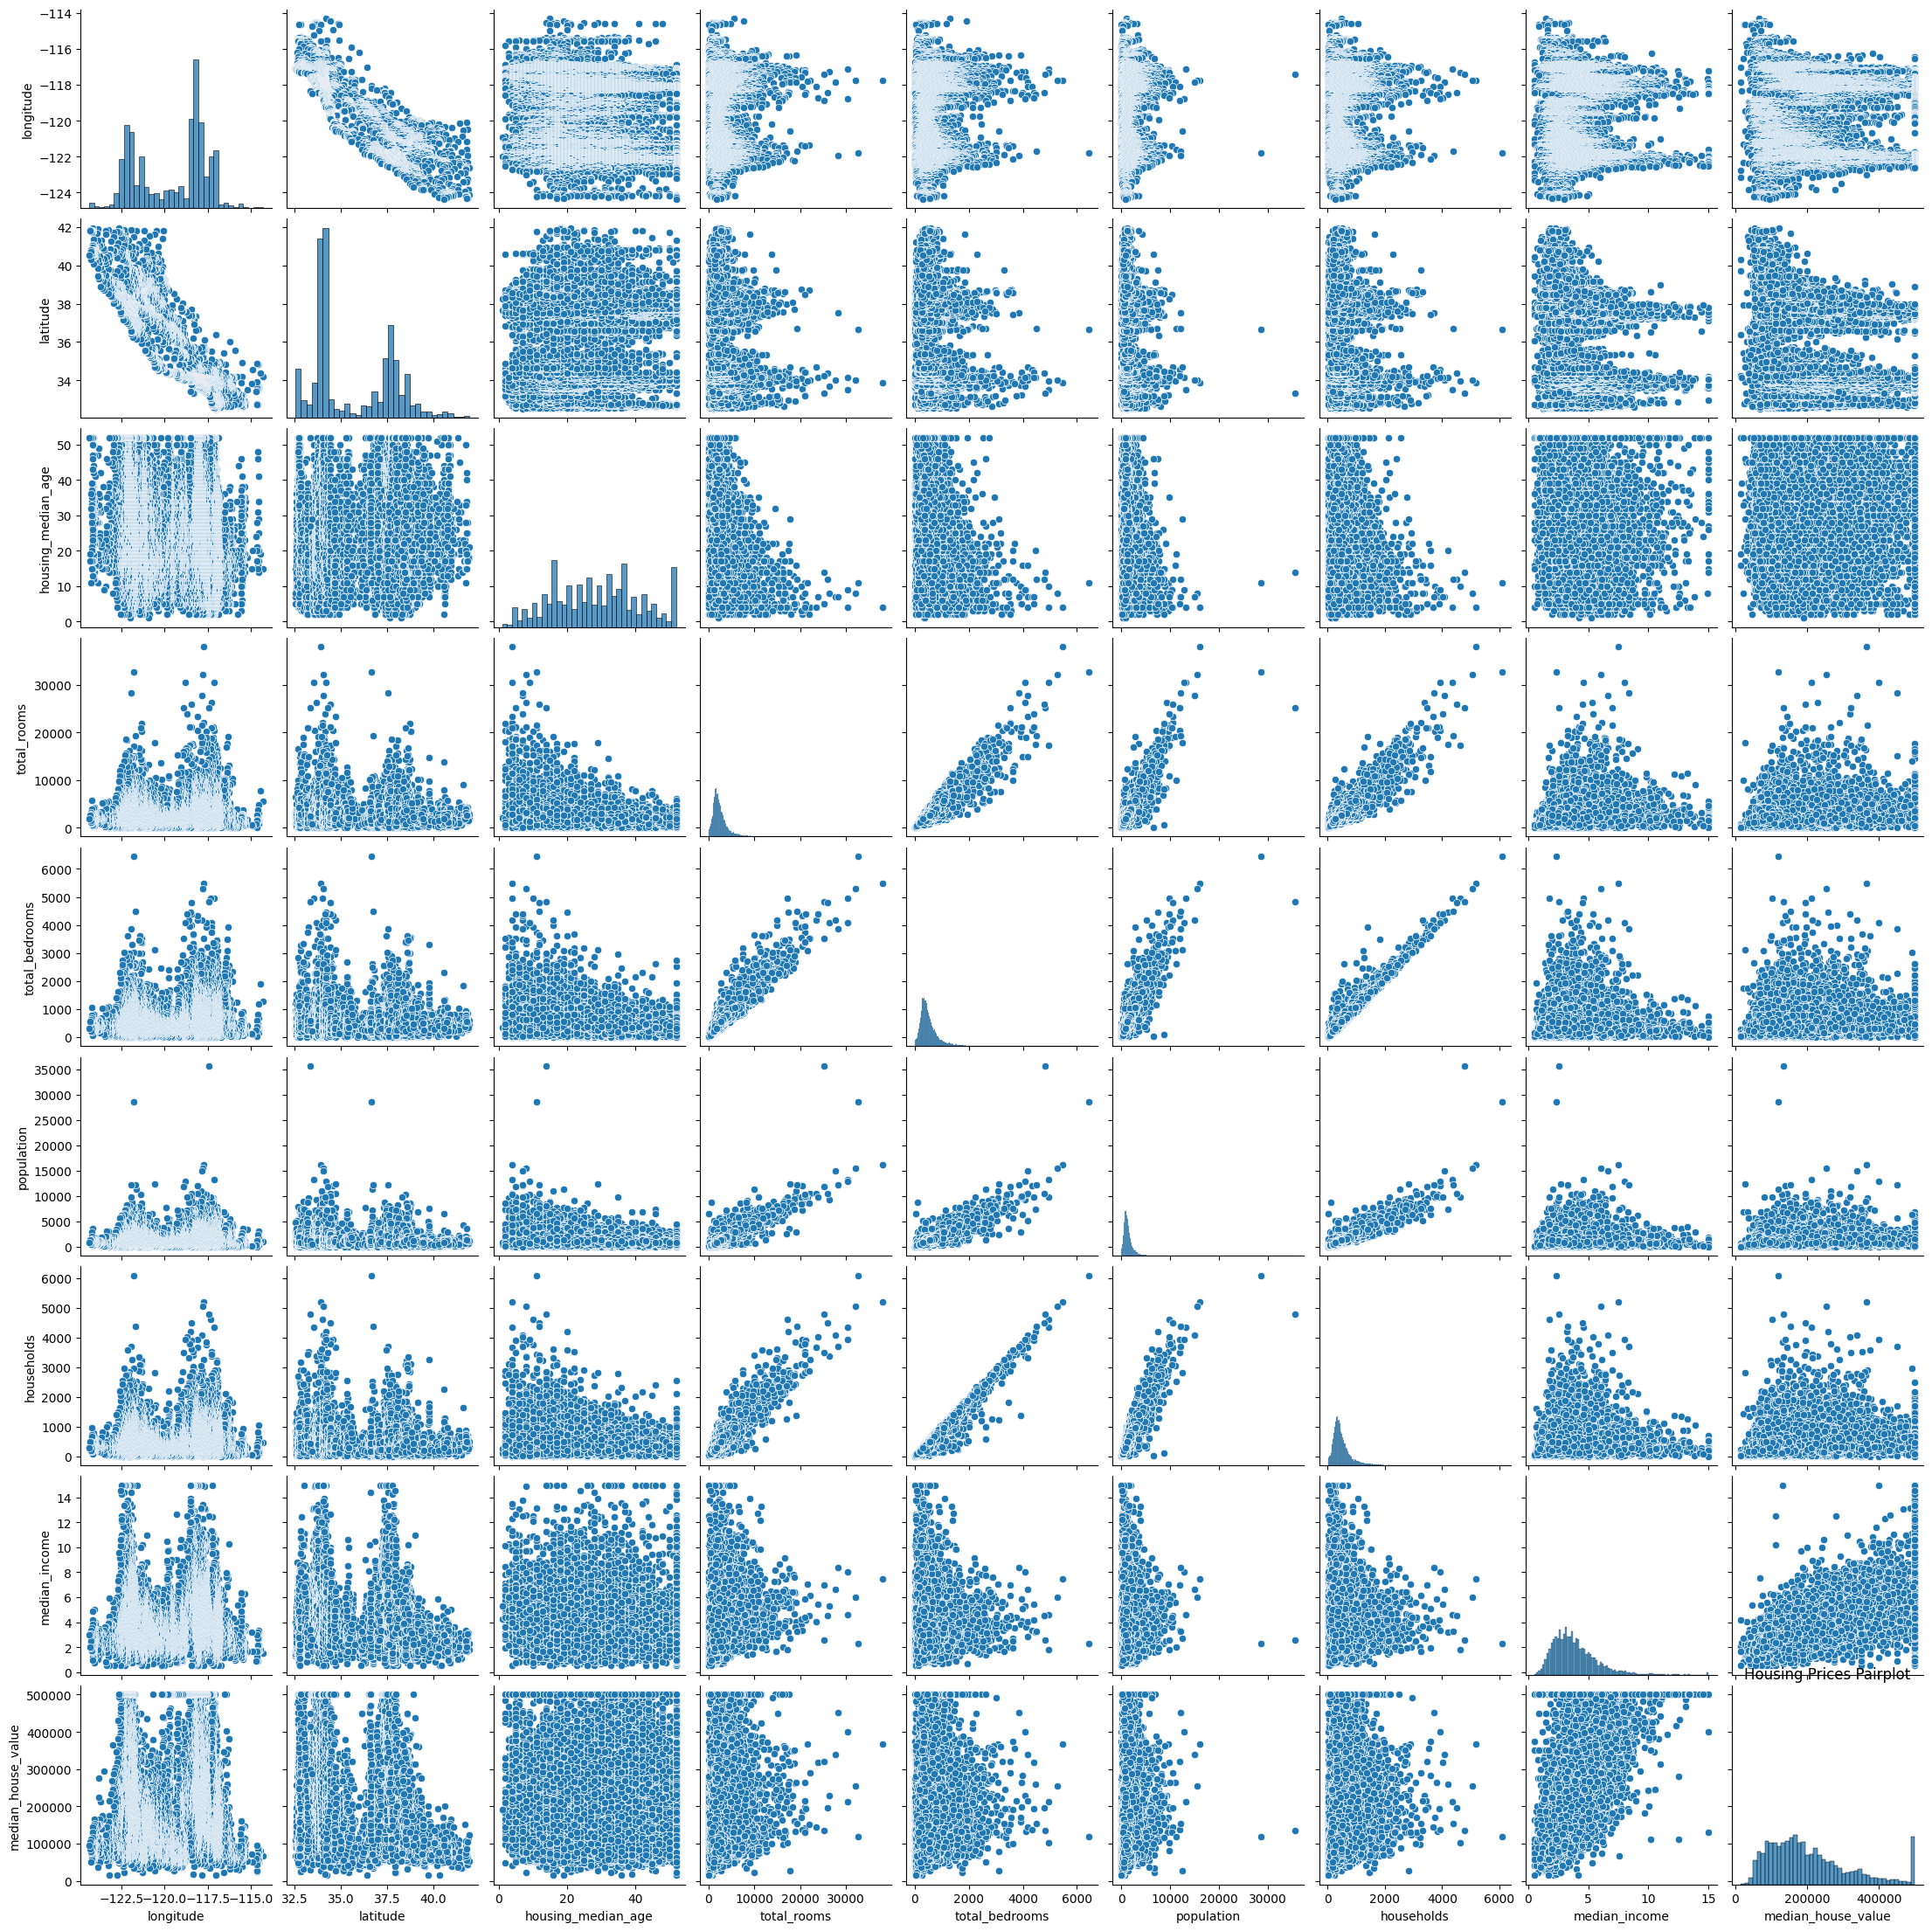

In [ ]:
import seaborn as sns

# making the pairplot
sns.pairplot(df)# giving a title to our plots
plt.title("Housing Prices Pairplot")

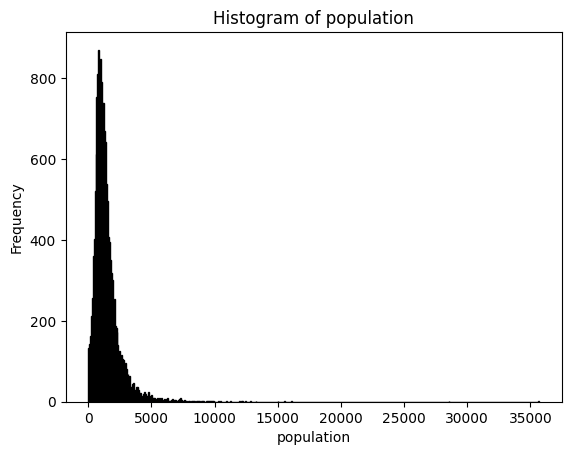

In [ ]:
import matplotlib.pyplot as plt
# Plot the histogram and capture bin values
hist_values, bin_edges, _ = plt.hist(house_data['population'], bins='auto', color='blue', edgecolor='black')
plt.xlabel('population')
plt.ylabel('Frequency')
plt.title('Histogram of population')

# Print bin values
# print("Bin Edges:", bin_edges)
# print("Histogram Values:", hist_values)

plt.show()

# left skewed, and generally normally distributed

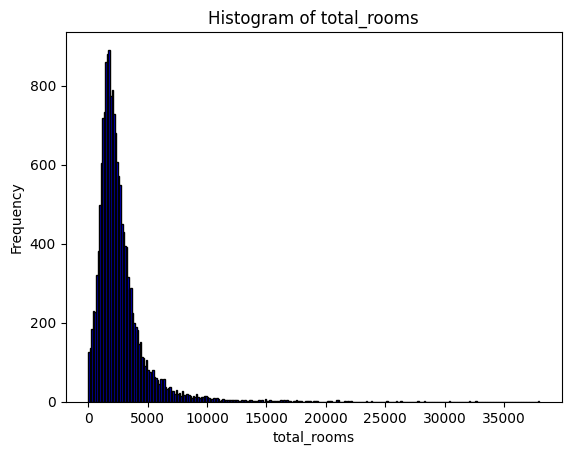

In [ ]:
import matplotlib.pyplot as plt
# Plot the histogram and capture bin values
hist_values, bin_edges, _ = plt.hist(house_data['total_rooms'], bins='auto', color='blue', edgecolor='black')
plt.xlabel('total_rooms')
plt.ylabel('Frequency')
plt.title('Histogram of total_rooms')

# Print bin values

plt.show()

# left skewed, and generally normally distributed

Creating the linear regression model

In [ ]:
house_data = pd.read_csv('/content/sample_data/california_housing_train.csv')

#Training Data
X = house_data[['population']]
y = house_data[['total_rooms']]

#Testing Data
test_df = pd.read_csv('/content/sample_data/california_housing_test.csv')
X_test = test_df[['population']]
y_test = test_df[['total_rooms']]

In [ ]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lr = lreg.fit(X, y)

In [11]:
print("Accuracy Score:", lr.score(X_test, y_test)*100)

# Example 4: Salary
Predicting someone's salary based off the years of experience

In [ ]:
#https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression
import pandas as pd

df = pd.read_csv('/content/Salary_dataset.csv')
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [ ]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = df[['YearsExperience']]
y = df[['Salary']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#instantiate the linear regression model

from sklearn.linear_model import LinearRegression
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9553063138044949